<a href="https://colab.research.google.com/github/dheerajreddy2020/Image-description-using-deep-learning/blob/master/Image_Description_Flickr30k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.15G/8.16G [02:12<00:00, 77.5MB/s]
100% 8.16G/8.16G [02:12<00:00, 65.9MB/s]


* https://www.kaggle.com/kunalgupta2616/flickr-8k-images-with-captions?select=captions.txt

In [3]:
import os
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree
from google.colab.patches import cv2_imshow
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
#os.chdir('/content/drive/My Drive/Capstone_project/Project_files')
#from preprocessing_functions import *

In [ ]:
#Unzipping the files
#os.mkdir('flickr_image_dataset')
!unzip -uq "flickr-image-dataset.zip" -d "flickr_image_dataset"


## Model Architecture

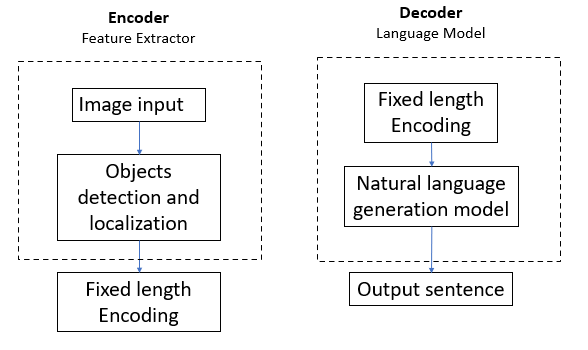

## Data Exploration

In [ ]:
images_df=pd.read_csv('results.csv',delimiter='|')
#images_df.drop('comment_number',inplace=True)
unique_images = images_df.image_name.value_counts().keys()
print(len(unique_images))
images_df.head(20)

31783


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


### Image Pre-processing

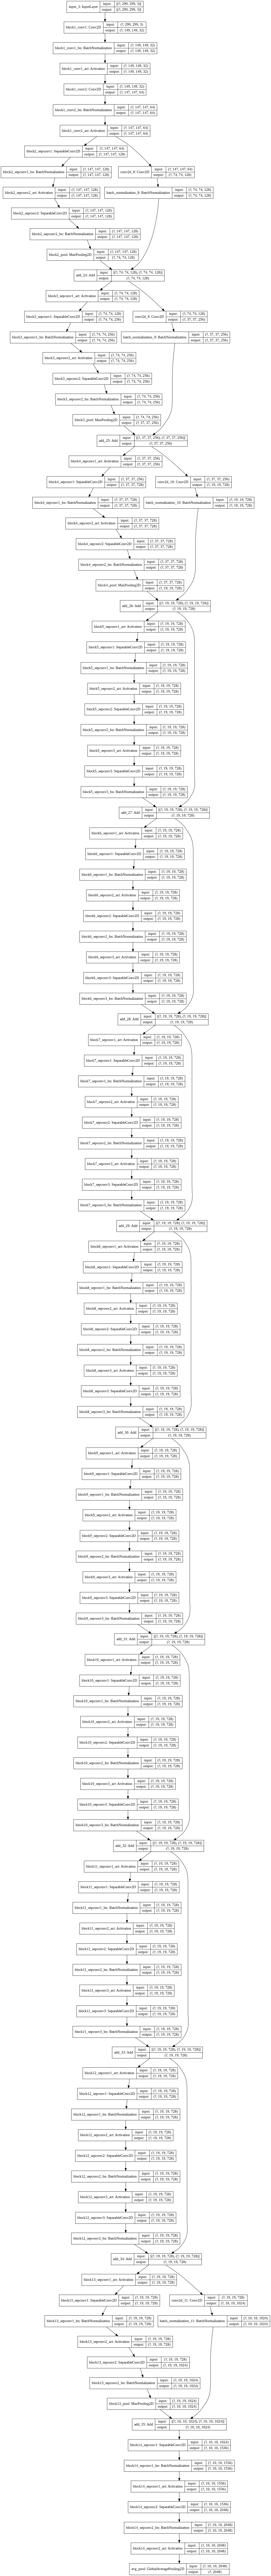

In [26]:
from tensorflow.keras.applications import InceptionV3, Xception, VGG16, InceptionResNetV2
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.xception import preprocess_input
#from tensorflow.keras.applications.VGG16 import preprocess_input
#from tensorflow.keras.applications.Inception_resNet_v2 import preprocess_input
from keras.models import Model
from keras.preprocessing.image import img_to_array, load_img
import cv2

#model = InceptionV3(weights='imagenet')
#model = InceptionResNetV2(weights='imagenet')
xception_model = Xception(weights='imagenet')
encoder_model = Model(inputs=xception_model.inputs, outputs=xception_model.layers[-2].output)

#encoder_model.summary()


def extract_features(directory,model):
  # load the model
  # re-structure the model
  # summarize
  # extract features from each photo
  features = dict()
  for name in os.listdir(directory):
    # load an image from file
    filename = directory + '/' + name
    try:
      image = load_img(filename, target_size=(299, 299))
      # convert the image pixels to a numpy array
      image = img_to_array(image)
      # reshape data for the model
      image = np.expand_dims(image, axis=0)
      # prepare the image for the model
      image = preprocess_input(image)
      # get features
      feature = model.predict(image, verbose=0)
      np.reshape(feature, feature.shape[1])
      # get image id
      image_id = name.split('.')[0]
      # store feature
      features[image_id] = feature
      print('>%s' % name)
    except:
      next
  return features

def get_encoder_features(image,model):
  image = cv2.resize(image,(299,299))
  image = img_to_array(image)
  # reshape data for the model
  image = np.expand_dims(image, axis=0)
  # prepare the image for the model
  image = preprocess_input(image)
  # get features
  feature = model.predict(image, verbose=0)
  np.reshape(feature, feature.shape[1])
  return feature

tf.keras.utils.plot_model(encoder_model, show_shapes=True)

In [4]:
# Saving Encoder model
save_loc = '/content/drive/MyDrive/Flickr_30k/'
from tensorflow.keras.models import load_model
encoder_model.save(save_loc+'Xception_encoder.h5')


In [ ]:
# extract features from all images for model training purpose
directory = 'flickr30k_images'
features = extract_features(directory,encoder_model)
print('Extracted Features: %d' % len(features))
# save to file

Streaming output truncated to the last 5000 lines.
>1043819504.jpg
>2831313661.jpg
>4549048831.jpg
>4946023775.jpg
>3122606953.jpg
>4980003913.jpg
>4525785614.jpg
>112411540.jpg
>6201592880.jpg
>4726725769.jpg
>3169591322.jpg
>3410215754.jpg
>3825927201.jpg
>3572152466.jpg
>1864566210.jpg
>4635028428.jpg
>3417231408.jpg
>3258874419.jpg
>476444908.jpg
>7973583420.jpg
>4878985410.jpg
>3485657956.jpg
>2454923455.jpg
>1005216151.jpg
>6789729828.jpg
>4853382595.jpg
>4163617605.jpg
>7990171495.jpg
>410453140.jpg
>3324375078.jpg
>3258993719.jpg
>157397733.jpg
>2160230494.jpg
>4686363111.jpg
>3182501707.jpg
>2076428547.jpg
>2953684252.jpg
>4633639059.jpg
>5302864546.jpg
>15085612.jpg
>109982467.jpg
>6939695046.jpg
>5266810229.jpg
>3374384485.jpg
>5057044059.jpg
>3366424545.jpg
>8016751611.jpg
>1580920460.jpg
>33237925.jpg
>4913689385.jpg
>3894241635.jpg
>236730743.jpg
>2937497894.jpg
>2957682838.jpg
>699448056.jpg
>2254442869.jpg
>4618355872.jpg
>4088598675.jpg
>233242340.jpg
>2623486975.jpg
>

In [ ]:
print(len(features))
from pickle import dump
#dump(features, open('features.pkl', 'wb'))
dump(features, open(save_loc+'Xception_features.pkl', 'wb'))

31779


### Text Embeddings

In [ ]:
image = unique_images[0]
temp_df = images_df[images_df.image_name==image]
list(temp_df[' comment'])

[' Two men in light colored shirts and dark pants sit on a balcony conversing as a lone car passes below .',
 ' A man holding a cup and wearing a yellow striped shirt is sitting next to a man wearing a blue shirt .',
 ' Two men sit on a balcony overlooking the street and buildings below .',
 ' two indian guys lounging outside .',
 ' Two arab men laughing and joking']

In [4]:
import string
import pickle

def form_image_dict(unique_images,images_df):
  descriptions = dict()
  j=0
  for image in unique_images:
    temp_df = images_df[images_df.image_name==image]
    j+=1
    image_id = image.split('.')[0]
    descriptions[image_id] = list(temp_df[' comment'])
  return descriptions,j

def preprocess_sentences(descriptions):
  table = str.maketrans("","",string.punctuation)
  for key, desc_list in descriptions.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        # tokenize
        try:
          desc = desc.split()
          # convert to lower case
          desc = [word.lower() for word in desc]
          # remove punctuation from each token
          desc = [w.translate(table) for w in desc]
          # remove hanging 's' and 'a'
          desc = [word for word in desc if len(word)>1]
          # remove tokens with numbers in them
          desc = [word for word in desc if word.isalpha()]
          # store as string
          desc_list[i] =  ' '.join(desc)
        except:
          next
  return desc_list

def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

def set_vocabulary(descriptions):
  vocabulary = set()
  for key in descriptions.keys():
    [vocabulary.update(d.split()) for d in descriptions[key]]
  return vocabulary

def limit_vocab_words(descriptions,word_count_threshold):
  all_captions = []
  for key, val in descriptions.items():
    for cap in val:
        all_captions.append(cap)
  # Consider only words which occur at least 10 times in the corpus
  word_counts = {}
  nsents = 0
  for sent in all_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1
  vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
  return vocab

In [ ]:
#filename = 'captions.txt'
#descriptions,no_of_sentences = form_image_dict(unique_images,images_df)
#print(f'Total Number of sentences in the Corpus: {no_of_sentences}')
desc_list = preprocess_sentences(descriptions)

unique_images = list(descriptions.keys())
print(len(unique_images))
images_for_training = unique_images[:26000]
images_for_validation = unique_images[26000:]
train_images = []
valid_images = []
test_images = []
for i in range(len(images_for_training)):
  train_images.append(images_for_training[i])
for i in range(len(images_for_validation)):
  valid_images.append(images_for_training[i])
print(f'train images: {len(train_images)}, Validation images: {len(valid_images)}')


31783
train images: 26000, Validation images: 5783


In [ ]:
################################################################
################## RUN ONLY ONCE ###############################
## Appending 'startseq' and 'endseq' to the descriptions to understand the sentence start and finish
train_descriptions = dict()
valid_descriptions = dict()
test_descriptions = dict()

for image_id in train_images:
  image_1 = image_id
  for a in descriptions[image_1]:
    try:
        train_descriptions[image_1].append('startseq '+a+' endseq')
    except:
        train_descriptions[image_1] = list()
        train_descriptions[image_1].append('startseq '+a+' endseq')
f = open(save_loc+"train_descriptions.pkl","wb")
pickle.dump(train_descriptions,f)
f.close()


for image_id in valid_images:
  image_1 = image_id
  for a in descriptions[image_1]:
    try:
        valid_descriptions[image_1].append('startseq '+a+' endseq')
    except:
        valid_descriptions[image_1] = list()
        valid_descriptions[image_1].append('startseq '+a+' endseq')
f = open(save_loc+"valid_descriptions.pkl","wb")
pickle.dump(valid_descriptions,f)
f.close()


In [3]:
## Loading descriptions
import os
os.chdir('/content/drive/MyDrive/Flickr_30k')
from pickle import load
def load_descriptions(filename):
	# load all features
	descriptions = load(open(filename, 'rb'))
	# filter features
	return descriptions
train_descriptions = load_descriptions('train_descriptions.pkl')
valid_descriptions = load_descriptions('valid_descriptions.pkl')

In [4]:
train_images=list(train_descriptions.keys())
valid_images=list(valid_descriptions.keys())
print(len(train_images),len(valid_images))

26000 5783


In [ ]:
train_images[:5]

['17840997', '4166168198', '4861894586', '6354735653', '3594822096']

#### Set Vocabulary

In [6]:
vocabulary = set_vocabulary(train_descriptions)
print('Original Vocabulary Size: %d' % len(vocabulary))
vocab_size = len(vocabulary)+1
vocab = limit_vocab_words(train_descriptions,10)
print('Processed Vocabulary Size: %d' % len(vocab))
vocab_size = len(vocab)+1

Original Vocabulary Size: 18205
Processed Vocabulary Size: 4909


In [7]:
from pickle import load

def create_tokenizer(vocab):
  ixtoword = {}
  wordtoix = {}
  ix = 1
  for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1
  f = open("wordtoix.pkl","wb")
  pickle.dump(wordtoix,f)
  f.close()

  f = open("ixtoword.pkl","wb")
  pickle.dump(ixtoword,f)
  f.close()

# convert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
 all_desc = list()
 for key in descriptions.keys():
  [all_desc.append(d) for d in descriptions[key]]
 return all_desc

# calculate the length of the description with the most words
def max_length(descriptions):
 lines = to_lines(descriptions)
 return max(len(d.split()) for d in lines)

def load_photo_features(filename, dataset):
  # load all features
  features=dict()
  all_features = load(open(filename, 'rb'))
  # filter features
  for k in dataset:
    try:
      features[k] = all_features[k]
    except:
      next
  return features

In [8]:
filename='Xception_features.pkl'
all_features = load(open(filename, 'rb'))
len(all_features)

31779

In [10]:
create_tokenizer(vocab)

wordtoix = load_descriptions('wordtoix.pkl')
ixtoword = load_descriptions('ixtoword.pkl')
max_length = max_length(train_descriptions)
print('Max Description Length: %d' % max_length)

Max Description Length: 74


In [11]:
train_features = load_photo_features('Xception_features.pkl', train_images)
valid_features = load_photo_features('Xception_features.pkl', valid_images)
#test_features = load_photo_features('Xception_features.pkl', test_images)
print(len(train_features),len(valid_features))

25997 5781


In [13]:
list(train_features.keys())[0]

'17840997'

In [17]:
feature_temp = train_features['17840997']
feature_temp = np.reshape(feature_temp, feature_temp.shape[1])
print(feature_temp.shape)

(2048,)


In [18]:
def sentence_from_index_list(seq,ixtoword):
  sentence = [ixtoword[index] for index in seq]
  final_sentence = ' '.join(word for word in sentence)
  return final_sentence

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
def create_sequences(wordtoix, max_length, desc_list, photo, vocab_size):
  X1, X2, y = list(), list(), list()
  # walk through each description for the image
  for desc in desc_list:
    print(desc)
    # encode the sequence
    seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
			# split into input and output pair
      in_seq, out_seq = seq[:i], seq[i]
      print(f'{sentence_from_index_list(in_seq,ixtoword)} \t {ixtoword[out_seq]}')
      # pad input sequence
      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
      # encode output sequence
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      # store
      #print(in_seq,out_seq)
      X1.append(photo)
      X2.append(in_seq)
      y.append(out_seq)
  return np.array(X1), np.array(X2), np.array(y)
 
def data_generator(descriptions, photos, wordtoix, max_length, vocab_size, batch_size = 10):
	# loop for ever over images
  while 1:
    bt = 1
    X1, X2, y = list(), list(), list()
    for key in photos.keys():
      desc_list = descriptions[key]
      bt += 1
      # retrieve the photo feature
      photo = photos[key]
      photo = np.reshape(photo, photo.shape[1])
      # walk through each description for the image
      for desc in desc_list:
        # encode the sequence
        seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
			    # split into input and output pair
          in_seq, out_seq = seq[:i], seq[i]
          # pad input sequence
          in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
          # encode output sequence
          out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
          #print(in_seq,out_seq)
          X1.append(photo)
          X2.append(in_seq)
          y.append(out_seq)
      if bt == batch_size:
        bt = 1
        yield ([np.array(X1), np.array(X2)], np.array(y))
        X1, X2, y = list(), list(), list()



In [ ]:
print(vocab_size)
print(max_length)

4910
74


In [20]:
key = list(train_descriptions.keys())[2]
desc_list = train_descriptions[key]
#print(desc_list)
photo = train_features[key]
photo = np.reshape(photo, photo.shape[1])
print(photo.shape)
x1, x2, y = create_sequences(wordtoix, max_length, desc_list, photo, vocab_size)

(2048,)
startseq asian kids who are wearing backpacks are standing in front of yellow school bus endseq
startseq 	 asian
startseq asian 	 kids
startseq asian kids 	 who
startseq asian kids who 	 are
startseq asian kids who are 	 wearing
startseq asian kids who are wearing 	 backpacks
startseq asian kids who are wearing backpacks 	 are
startseq asian kids who are wearing backpacks are 	 standing
startseq asian kids who are wearing backpacks are standing 	 in
startseq asian kids who are wearing backpacks are standing in 	 front
startseq asian kids who are wearing backpacks are standing in front 	 of
startseq asian kids who are wearing backpacks are standing in front of 	 yellow
startseq asian kids who are wearing backpacks are standing in front of yellow 	 school
startseq asian kids who are wearing backpacks are standing in front of yellow school 	 bus
startseq asian kids who are wearing backpacks are standing in front of yellow school bus 	 endseq
startseq group of students are outside 

In [ ]:
print(x1.shape,x2.shape,y.shape)

(54, 2048) (54, 74) (54, 4910)


In [21]:
BATCH_SIZE = 50
train_generator = data_generator(train_descriptions,train_features,wordtoix, max_length, vocab_size,batch_size=BATCH_SIZE)
valid_generator = data_generator(valid_descriptions,valid_features,wordtoix, max_length, vocab_size,batch_size=20)

In [ ]:
os.chdir('/content')
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-12-12 20:04:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-12 20:04:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-12 20:04:19--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip -uq "glove.6B.zip" -d "/content/drive/MyDrive/Flickr_30k"


In [ ]:
os.chdir('/content/drive/MyDrive/Flickr_30k')
# Load Glove vectors
embeddings_index = {} # empty dictionary
f = open('glove.6B.200d.txt', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()


In [ ]:
embedding_dim = 200
# Get 200-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in wordtoix.items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, add, Embedding, LSTM, Bidirectional
from keras.models import load_model


INP_SIZE = 2048

def make_model(In_size=INP_SIZE):
  # image feature extractor model
  inputs1 = Input(shape=(2048,))
  fe1 = Dropout(0.5)(inputs1)
  fe2 = Dense(256, activation='relu')(fe1)

  # partial caption sequence model
  inputs2 = Input(shape=(max_length,))
  #inputs2 = pre_trained.output
  se1 = Embedding(vocab_size, embedding_dim, mask_zero=True, name = 'Embedding')(inputs2)
  se2 = Dropout(0.5)(se1)
  se3 = LSTM(256)(se2)

  # decoder (feed forward) model
  decoder1 = add([fe2, se3])
  decoder2 = Dense(256, activation='relu')(decoder1)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)

  # merge the two input models
  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
  return model

try:
  model = load_model('Xception_200dwordvec_model.h5')
  print(True)
  for layer in model.layers:
    if layer.name == 'Embedding':
      layer.trainable = False
except:
  model = make_model()
  for layer in model.layers:
    if layer.name == 'Embedding':
      layer.set_weights([embedding_matrix])
      layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

True
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 74)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
Embedding (Embedding)           (None, 74, 200)      982000      input_5[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_4[0][0]                    
__________________________________________________________________________________

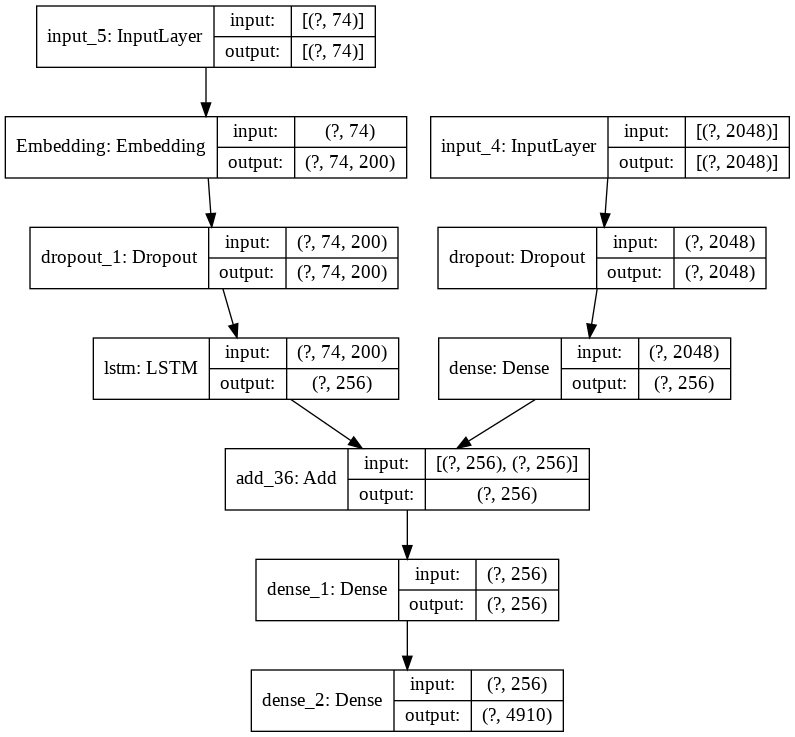

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)
# black and white dog is running through the snow

In [29]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.97) and (logs.get('val_accuracy')<0.85):
            print('\nModel is overfitting hence stopped training')
            self.model.stop_training=True
        if(logs.get('accuracy')>0.98) and (logs.get('val_accuracy')>0.98):
            print('\nModel is accurate hence stopped training')
            self.model.stop_training=True

checkpoint_filepath = 'xception_checkpoint.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
callbacks=[myCallback(),early_stopping,model_checkpoint_callback]

In [30]:
tf.keras.backend.clear_session()
epoch_steps = int(len(train_features)/BATCH_SIZE)
model.fit(train_generator,validation_data=valid_generator,epochs=100, 
          steps_per_epoch=epoch_steps, verbose = 1, validation_steps = 250, 
          callbacks = callbacks)

Epoch 1/100
519/519 [==============================] - 181s 348ms/step - loss: 2.8901 - accuracy: 0.3510 - val_loss: 2.6624 - val_accuracy: 0.3845
Epoch 2/100
519/519 [==============================] - 179s 346ms/step - loss: 2.8697 - accuracy: 0.3532 - val_loss: 2.6727 - val_accuracy: 0.3822
Epoch 3/100
519/519 [==============================] - 179s 344ms/step - loss: 2.8640 - accuracy: 0.3537 - val_loss: 2.6785 - val_accuracy: 0.3810
Epoch 4/100
519/519 [==============================] - 178s 343ms/step - loss: 2.8629 - accuracy: 0.3536 - val_loss: 2.6688 - val_accuracy: 0.3831
Epoch 5/100
519/519 [==============================] - 178s 343ms/step - loss: 2.8591 - accuracy: 0.3548 - val_loss: 2.6642 - val_accuracy: 0.3837
Epoch 6/100
519/519 [==============================] - 178s 343ms/step - loss: 2.8578 - accuracy: 0.3543 - val_loss: 2.6601 - val_accuracy: 0.3838


In [ ]:
	model.save('Xception_200dwordvec_model.h5')

In [ ]:
from keras.models import load_model
decoder_model = load_model('Xception_200dwordvec_model.h5')

## Prediction Functions

In [31]:
from pickle import load
import cv2
import os
import matplotlib.pyplot as plt
from keras_preprocessing.image import img_to_array
import numpy as np
from PIL import Image

os.chdir('/content/drive/MyDrive/Flickr_30k')

def load_descriptions(filename):
	# load all features
	descriptions = load(open(filename, 'rb'))
	# filter features
	return descriptions

from numpy import argmax
from tensorflow.keras.preprocessing.sequence import pad_sequences
def generate_description(model, photo, wordtoix, ixtoword, max_length, evaluation=False):
	# loop for ever over images
  # retrieve the photo feature
  in_text = 'startseq'
  #photo = photos[im_id]
  for i in range(max_length):
    sequence = [wordtoix[word] for word in in_text.split(' ') if word in wordtoix]
    sequence = pad_sequences([sequence], maxlen=max_length)
    yhat = model.predict([photo,sequence], verbose=0)
    yhat = argmax(yhat)
    word = ixtoword[yhat]
    if word is None:
      break
    in_text += ' '+word
    if word == 'endseq':
      break
  word_list = in_text.split(' ')[1:-1]
  final_sentence = ' '.join(word for word in word_list)
  if evaluation:
    return in_text
  else:
    return final_sentence

def evaluate_model(model, descriptions, photos, wordtoix, ixtoword, max_length):
  actual, predicted = list(), list()
  # step over the whole set
  for key, desc_list in descriptions.items():
    # generate description
    yhat = generate_description(key, photos, wordtoix, ixtoword, max_length, evaluation= True)
    # store actual and predicted
    references = [d.split() for d in desc_list]
    actual.append(references)
    predicted.append(yhat.split())
  return actual, predicted
	# calculate BLEU score

from tensorflow.keras.applications.xception import preprocess_input
def get_encoder_features(image,model):
  image = cv2.resize(image,(299,299))
  image = img_to_array(image)
  # reshape data for the model
  image = np.expand_dims(image, axis=0)
  # prepare the image for the model
  image = preprocess_input(image)
  #image = image/image.max()
  # get features
  feature = model.predict(image, verbose=0)
  np.reshape(feature, feature.shape[1])
  return feature

wordtoix = load_descriptions('wordtoix.pkl')
ixtoword = load_descriptions('ixtoword.pkl')
max_length = 74

In [32]:
from keras.models import load_model
encoder_model = load_model('Xception_encoder.h5')
decoder_model = load_model('Xception_200dwordvec_model.h5')

Images/2362377137_9528692825.jpg
people are standing in front of large building


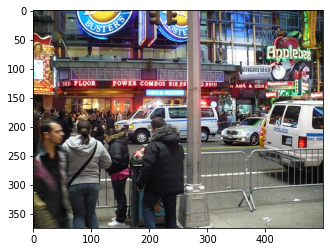

In [ ]:
im_id = test_images[200]
image_path = 'Images/'+im_id+'.jpg'
print(image_path)
image=cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
feature = get_encoder_features(image,encoder_model)
print(generate_description(decoder_model,feature, wordtoix, ixtoword, max_length))

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
actual,predicted = evaluate_model(model, test_descriptions, test_features, wordtoix, ixtoword, max_length)

In [ ]:
print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

BLEU-1: 0.688445
BLEU-2: 0.503219
BLEU-3: 0.375876
BLEU-4: 0.271072


In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(25,25))
for i in range(2):
  for j in range(2):
    rand_number=np.random.randint(0,len(test_images)-1)
    im_id = test_images[rand_number]
    image_path = 'Images/'+im_id+'.jpg'
    image=cv2.imread(image_path)
    feature = get_encoder_features(image,encoder_model)
    descs_list=generate_description(decoder_model,feature, wordtoix, ixtoword, max_length)
    #for a in descriptions:
     # descs_list= descs_list + a + '\n'
    ax[i,j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i,j].set_title(unique_images[rand_number])
    ax[i,j].set_xlabel(descs_list,fontsize='xx-large');

NameError: ignored

In [ ]:
def get_encoder_features(image,model):
  image = cv2.resize(image,(299,299))
  image = img_to_array(image)
  # reshape data for the model
  image = np.expand_dims(image, axis=0)
  # prepare the image for the model
  image = preprocess_input(image)
  #image = image/image.max()
  # get features
  feature = model.predict(image, verbose=0)
  np.reshape(feature, feature.shape[1])
  return feature
im_id = test_images[5]
image_path = 'Images/'+im_id+'.jpg'
image=cv2.imread(image_path)
feature = get_encoder_features(image,encoder_model)
print(feature.shape)

(1, 2048)


Saving 69189650_6687da7280.jpg to 69189650_6687da7280.jpg
the dog is running through the grass


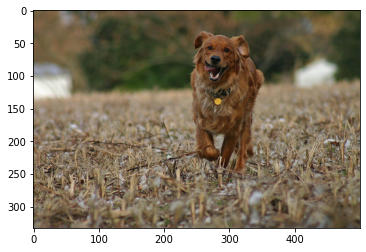

In [37]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  path = os.getcwd()+'/'+fn
  img = cv2.imread(path)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  feature = get_encoder_features(img,encoder_model)
  print(generate_description(decoder_model,feature, wordtoix, ixtoword, max_length))


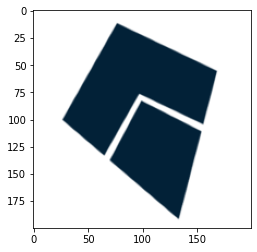

In [ ]:
import requests
from bs4 import BeautifulSoup
import io
import PIL
response = requests.get("https://i.imgur.com/ExdKOOz.png")
image_bytes = io.BytesIO(response.content)

img = PIL.Image.open(image_bytes)
plt.imshow(img)

In [ ]:
import pandas as pd
image_links = pd.read_csv('imageForTest.txt',delimiter=',').T
def string_delete(str1,str_list):
    str3 = str1
    for a in str_list:
        while a in str3:
            str3 = str3.replace(a,'')
    return str3

In [ ]:
image_links_list=[]

In [ ]:
import urllib
import io
url = 'https://www.google.com/imgres?imgurl=https%3A%2F%2Fimage.shutterstock.com%2Fimage-photo%2Fbright-spring-view-cameo-island-260nw-1048185397.jpg&imgrefurl=https%3A%2F%2Fwww.shutterstock.com%2Fcategory%2Fnature&tbnid=PDxUM2uh-Nz6cM&vet=12ahUKEwjEivCIw87tAhUVE80KHf5sAakQMygGegUIARDbAQ..i&docid=LlgDpz1LoiuznM&w=475&h=280&q=images&ved=2ahUKEwjEivCIw87tAhUVE80KHf5sAakQMygGegUIARDbAQ'
resp = urllib.request.urlopen(url)
#image_bytes = io.BytesIO(response.content)

#img = PIL.Image.open(image_bytes)
#print(img)

img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
feature = get_encoder_features(img,encoder_model)
print(generate_description(decoder_model,feature, wordtoix, ixtoword, max_length))


error: ignored